<a href="https://colab.research.google.com/github/Ivanbh214/Machine_learning_Course_CIFO/blob/main/D%C3%8DA_5/ExempleMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)
# 60000

len(x_test)
# 10000

# Finding the shape of individual sample
x_train[0].shape
# (28, 28)

(28, 28)

In [23]:
#x_train[0]

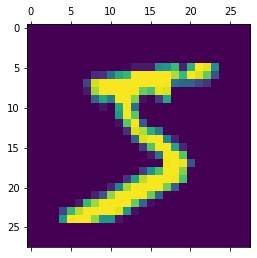

In [24]:
plt.matshow(x_train[0])

In [25]:
y_train[0]

5

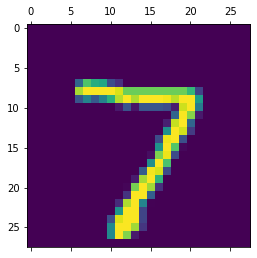

In [26]:
plt.matshow(x_test[0])

In [27]:
y_train[0]

# 5

5

In [28]:
y_test[0]

# 7

7

In [29]:
# Show first 5 data
y_train[:5]

# array([5, 0, 4, 1, 9], dtype=uint8)

array([5, 0, 4, 1, 9], dtype=uint8)

In [30]:
x_train.shape

#  (60000, 28, 28)

(60000, 28, 28)

In [31]:
y_train.shape

(60000,)

In [32]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [33]:
#x_train[0]

In [34]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)
x_test_flattened = x_test.reshape(len(x_test), 28 * 28)

In [35]:
x_train_flattened.shape

# (60000, 784)

(60000, 784)

In [36]:
x_test_flattened.shape

# (10000, 784)

(10000, 784)

In [37]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [40]:
#Para añadir una capa más constriur el percentron multicapa
#100 representa el numero de neuronas que tiene la capa, tiene que estar conectadas con la capa anterior
#10 es la capa de salida. en este caso no es necesario decir la capa de entrada
#2D se usa para redes convulucionales y no hay que aplanar los datos
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [41]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4135 - accuracy: 0.8938
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2008 - accuracy: 0.9437
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1491 - accuracy: 0.9568
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1172 - accuracy: 0.9668
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0948 - accuracy: 0.9735


In [43]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9696


[0.10249360650777817, 0.9696000218391418]

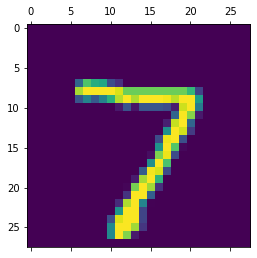

In [44]:
# Show the image
plt.matshow(x_test[0])

In [45]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([3.91061604e-02, 1.54720545e-02, 1.61181122e-01, 6.69250131e-01,
       5.90533018e-04, 5.54250181e-02, 4.13861153e-06, 9.99724627e-01,
       1.92908049e-02, 3.80913079e-01], dtype=float32)

In [46]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

# 7

7

In [47]:
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

# [7, 2, 1, 0, 4]

[7, 2, 1, 0, 4]

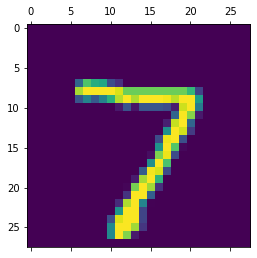

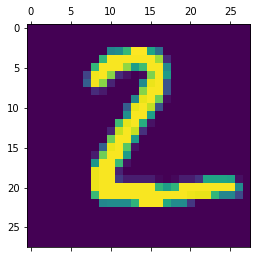

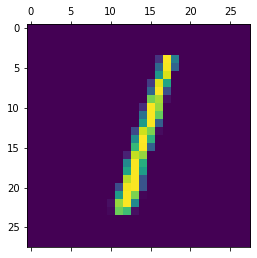

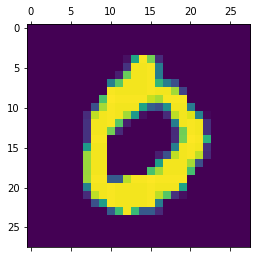

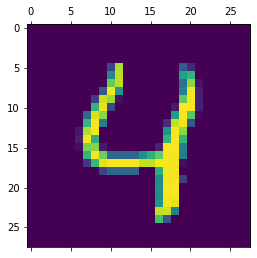

In [48]:
plt.matshow(x_test[0])
plt.matshow(x_test[1])
plt.matshow(x_test[2])
plt.matshow(x_test[3])
plt.matshow(x_test[4])